<a href="https://colab.research.google.com/github/pszemraj/ml4hc-s22-project01/blob/main/notebooks/colab/ensemble/Ensembles_PBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Basic Ensembling of Model Outputs </center>

<font color="pink"> - this one is for the PTB dataset </font>


In [1]:
#@markdown add auto-Colab formatting with `IPython.display`
from IPython.display import HTML, display
# colab formatting
def set_css():
    display(
        HTML(
            """
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  """
        )
    )

get_ipython().events.register("pre_run_cell", set_css)

In [2]:
!pip install -U pandas -q
import pandas as pd

In [3]:
!python -m pip uninstall -y matplotlib
!pip install matplotlib==3.1.3 -q
import matplotlib.pyplot as plt

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.36 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
!pip install scikit-learn==0.23.2 -q
import sklearn

In [5]:
!pip install -U pycaret[full] -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
!nvidia-smi

Mon Mar 28 05:35:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# setup

In [7]:
#@markdown add auto-Colab formatting with `IPython.display`
from IPython.display import HTML, display
# colab formatting
def set_css():
    display(
        HTML(
            """
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  """
        )
    )

get_ipython().events.register("pre_run_cell", set_css)

In [8]:
#@title mount drive
from pathlib import Path
from google.colab import drive

drive_base_str = '/content/drive'
drive.mount(drive_base_str)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#@markdown determine root
import os
from pathlib import Path
peter_base = Path('/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/')

if peter_base.exists() and peter_base.is_dir():
    path = str(peter_base.resolve())
else:
    # original
    path = '/content/drive/MyDrive/ETH/'

print(f"base drive dir is:\n{path}")

base drive dir is:
/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1


## define folder for outputs

In [10]:
_out_dir_name = "Trained-Results-Analysis" #@param {type:"string"}

output_path = os.path.join(path, _out_dir_name)
os.makedirs(output_path, exist_ok=True)
print(f"notebook outputs will be stored in:\n{output_path}")

notebook outputs will be stored in:
/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis


# test basic ensembling with PyCaret

- docs can be found [here](https://pycaret.gitbook.io/docs/get-started/tutorials)


In [11]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


## try ptb first

In [12]:
import pandas as pd 

In [13]:
root_dir = Path(path)
# /content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis/PTB_ensemble/ptb_testset_model_predictions.csv
ptb_result_path = root_dir / "Trained-Results-Analysis" / "PTB_ensemble" / "ptb_testset_model_predictions.csv"
PTB_df = pd.read_csv(ptb_result_path)

In [14]:
ptb_outpath = Path(output_path) / "PTB_ensemble"


In [15]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [16]:
from pycaret.classification import setup
ptb_exp = setup(data = PTB_df, target = 'actual_class', 
                session_id=123, use_gpu=True)
                

,Description,Value
0,session_id,123
1,Target,actual_class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2911, 6)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
ptb_best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9892,0.0000,0.9959,0.9891,0.9925,0.9733,0.9735,0.013
lda,Linear Discriminant Analysis,0.9892,0.9912,0.9959,0.9891,0.9925,0.9733,0.9735,0.012
lr,Logistic Regression,0.9882,0.9971,0.9945,0.9891,0.9918,0.9709,0.9710,0.020
svm,SVM - Linear Kernel,0.9877,0.0000,0.9925,0.9905,0.9914,0.9698,0.9699,0.010
rf,Random Forest Classifier,0.9877,0.9909,0.9925,0.9905,0.9914,0.9698,0.9699,0.794
ada,Ada Boost Classifier,0.9877,0.9971,0.9925,0.9904,0.9914,0.9698,0.9699,0.114
et,Extra Trees Classifier,0.9877,0.9838,0.9918,0.9911,0.9914,0.9698,0.9699,0.751
lightgbm,Light Gradient Boosting Machine,0.9877,0.9971,0.9938,0.9891,0.9915,0.9697,0.9698,0.045
catboost,CatBoost Classifier,0.9877,0.9970,0.9938,0.9891,0.9915,0.9697,0.9698,0.702
xgboost,Extreme Gradient Boosting,0.9868,0.9972,0.9925,0.9891,0.9908,0.9673,0.9674,0.155


### logistic regression

In [18]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9853,0.9998,0.9932,0.9864,0.9898,0.9637,0.9637
3,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
4,0.9853,0.9991,0.9932,0.9864,0.9898,0.9637,0.9637
5,0.9706,0.9900,0.9795,0.9795,0.9795,0.9277,0.9277
6,0.9804,0.9913,0.9932,0.9797,0.9864,0.9513,0.9516
7,0.9901,0.9913,0.9931,0.9931,0.9931,0.9759,0.9759
8,0.9951,0.9999,1.0000,0.9932,0.9966,0.9877,0.9878


In [19]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9853,0.9998,1.0000,0.9799,0.9898,0.9633,0.9639
3,0.9902,0.9998,1.0000,0.9865,0.9932,0.9757,0.9759
4,0.9853,0.9991,0.9932,0.9864,0.9898,0.9637,0.9637
5,0.9755,0.9893,0.9863,0.9796,0.9829,0.9395,0.9395
6,0.9804,0.9893,0.9932,0.9797,0.9864,0.9513,0.9516
7,0.9901,0.9900,0.9931,0.9931,0.9931,0.9759,0.9759
8,0.9951,0.9999,1.0000,0.9932,0.9966,0.9877,0.9878


In [20]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [21]:
save_model(tuned_lr, model_name=ptb_outpath/"tuned_lr_ptb")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.056, class_w

### lightgbm

In [22]:
lightgbm = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9902,0.9993,1.0000,0.9865,0.9932,0.9757,0.9759
3,0.9804,0.9993,0.9863,0.9863,0.9863,0.9518,0.9518
4,0.9902,0.9991,1.0000,0.9865,0.9932,0.9757,0.9759
5,0.9755,0.9904,0.9863,0.9796,0.9829,0.9395,0.9395
6,0.9755,0.9914,0.9863,0.9796,0.9829,0.9395,0.9395
7,0.9852,0.9922,0.9862,0.9931,0.9896,0.9640,0.9640
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [23]:
tuned_lightgbm = tune_model(lightgbm)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9902,0.9998,1.0000,0.9865,0.9932,0.9757,0.9759
3,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
4,0.9853,0.9991,0.9932,0.9864,0.9898,0.9637,0.9637
5,0.9706,0.9899,0.9795,0.9795,0.9795,0.9277,0.9277
6,0.9804,0.9903,0.9932,0.9797,0.9864,0.9513,0.9516
7,0.9901,0.9905,0.9931,0.9931,0.9931,0.9759,0.9759
8,0.9951,0.9998,1.0000,0.9932,0.9966,0.9877,0.9878


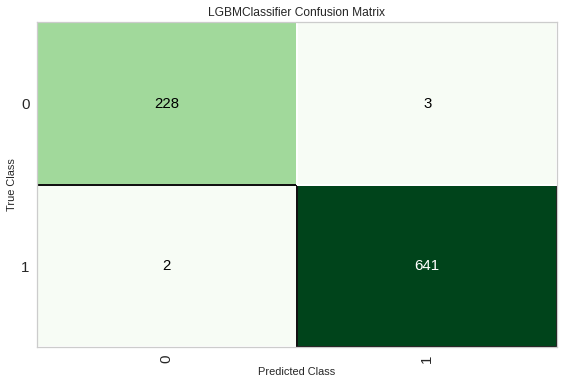

In [24]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [25]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
save_model(tuned_lightgbm, model_name=ptb_outpath/"ensemble_lgbm_ptb")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
       

### xgboost

In [27]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0000,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9853,0.9991,0.9932,0.9864,0.9898,0.9637,0.9637
3,0.9804,0.9995,0.9863,0.9863,0.9863,0.9518,0.9518
4,0.9902,0.9991,1.0000,0.9865,0.9932,0.9757,0.9759
5,0.9755,0.9904,0.9863,0.9796,0.9829,0.9395,0.9395
6,0.9755,0.9923,0.9863,0.9796,0.9829,0.9395,0.9395
7,0.9852,0.9921,0.9862,0.9931,0.9896,0.9640,0.9640
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [28]:
tuned_xg = tune_model(xgboost)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9902,1.0000,1.0,0.9865,0.9932,0.9757,0.9759
1,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
2,0.9804,0.9998,1.0,0.9733,0.9865,0.9508,0.9519
3,0.9902,1.0000,1.0,0.9865,0.9932,0.9757,0.9759
4,0.9902,0.9991,1.0,0.9865,0.9932,0.9757,0.9759
5,0.9853,0.9899,1.0,0.9799,0.9898,0.9633,0.9639
6,0.9853,0.9913,1.0,0.9799,0.9898,0.9633,0.9639
7,0.9901,0.9911,1.0,0.9864,0.9932,0.9756,0.9759
8,0.9951,0.9999,1.0,0.9932,0.9966,0.9877,0.9878


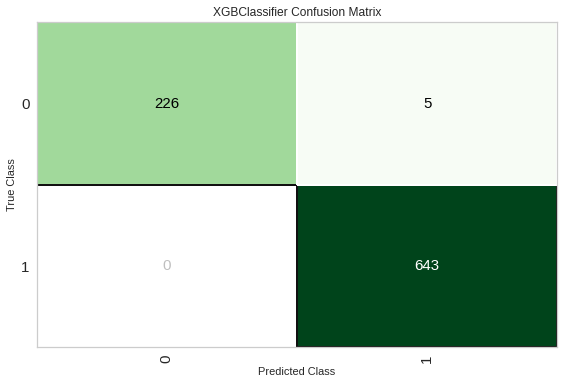

In [29]:
plot_model(tuned_xg, plot = 'confusion_matrix')

In [30]:
evaluate_model(tuned_xg)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [31]:
save_model(tuned_xg, model_name=ptb_outpath/"tuned_xg_ptb")


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='actual_class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                max_delta_step=0, max_depth=1,
                                min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                              

# lazypredict

- docs are on [pypip here](https://pypi.org/project/lazypredict/)


In [32]:
!pip install lazypredict -q


     |████████████████████████████████| 6.8 MB 15.8 MB/s 
     |████████████████████████████████| 14.5 MB 54.7 MB/s 
     |████████████████████████████████| 1.2 MB 60.4 MB/s 
     |████████████████████████████████| 302 kB 76.2 MB/s 
     |████████████████████████████████| 72 kB 1.3 MB/s 
     |████████████████████████████████| 127.6 MB 23 kB/s 
     |████████████████████████████████| 10.1 MB 50.5 MB/s 
     |████████████████████████████████| 269 kB 71.8 MB/s 
     |████████████████████████████████| 248 kB 68.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.1 which is incompatible.
pycaret 2.3.9 requires scikit-learn==0.23.2, but you have scikit-learn 0.23.1 which is incompatible.
pandas-profiling 3.1.

In [33]:
lf_ptb_df = PTB_df.copy()
y = lf_ptb_df.actual_class.values
del lf_ptb_df["actual_class"]
X = lf_ptb_df.values
print(X.shape, y.shape)

(2911, 5) (2911,)


In [34]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 17.04it/s]


In [35]:
import pprint as pp
# pp.pprint(models)

m_df = pd.DataFrame(models).convert_dtypes()
# m_df.to_csv()
# m_df.to_csv(ptb_outpath / "lazypredict_mitbih.csv")

m_df

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreeClassifier,1.00,0.99,0.99,1.00,0.01
ExtraTreesClassifier,1.00,0.99,0.99,1.00,0.18
LabelPropagation,1.00,0.99,0.99,1.00,0.27
LabelSpreading,1.00,0.99,0.99,1.00,0.28
BaggingClassifier,1.00,0.99,0.99,1.00,0.03
GaussianNB,0.99,0.99,0.99,0.99,0.02
DecisionTreeClassifier,0.99,0.99,0.99,0.99,0.02
RandomForestClassifier,1.00,0.99,0.99,1.00,0.16
PassiveAggressiveClassifier,0.99,0.99,0.99,0.99,0.02


In [36]:
import joblib

_out_lp_ptb = Path(ptb_outpath) / "LP_ptb_ensemble_baselines_pandas.pkl"
joblib.dump(m_df, filename=_out_lp_ptb, compress=True)

['/content/drive/MyDrive/ETHZ-2022-S/ML-healthcare-projects/project1/Trained-Results-Analysis/PTB_ensemble/LP_ptb_ensemble_baselines_pandas.pkl']